 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [144]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrame into a single DataFrame.

Frames:

1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [95]:
# Convert files into DataFrames

whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns.head()

combined_whale_algo_sp500.head()
combined_whale_algo_sp500.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


In [96]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [97]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [98]:
# Drop nulls
whale_returns.dropna(inplace=True)

print(whale_returns.isnull().sum())

whale_returns.head()
# YOUR CODE HERE
      

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [99]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [100]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [101]:
# Drop nulls
algo_returns.dropna(inplace=True)
#algo_returns.isnull().sum()  done
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [102]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [103]:
# Check Data Types
sp500_history.dtypes
sp500_history["Close"] = sp500_history["Close"].replace({'\$':''}, regex = True)
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Fix Data Types

In [104]:
# Fix Data Types
# sp500_history.to_numeric
sp500_history.dtypes
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [105]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [106]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
# sp500_daily_returns.isnull().sum()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [107]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {"Close":"S&P 500"})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [ ]:
Calculate Daily 

## Combine Whale, Algorithmic, and S&P 500 Returns

In [108]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_whale_algo_sp500 = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
combined_whale_algo_sp500.head()
combined_whale_algo_sp500.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

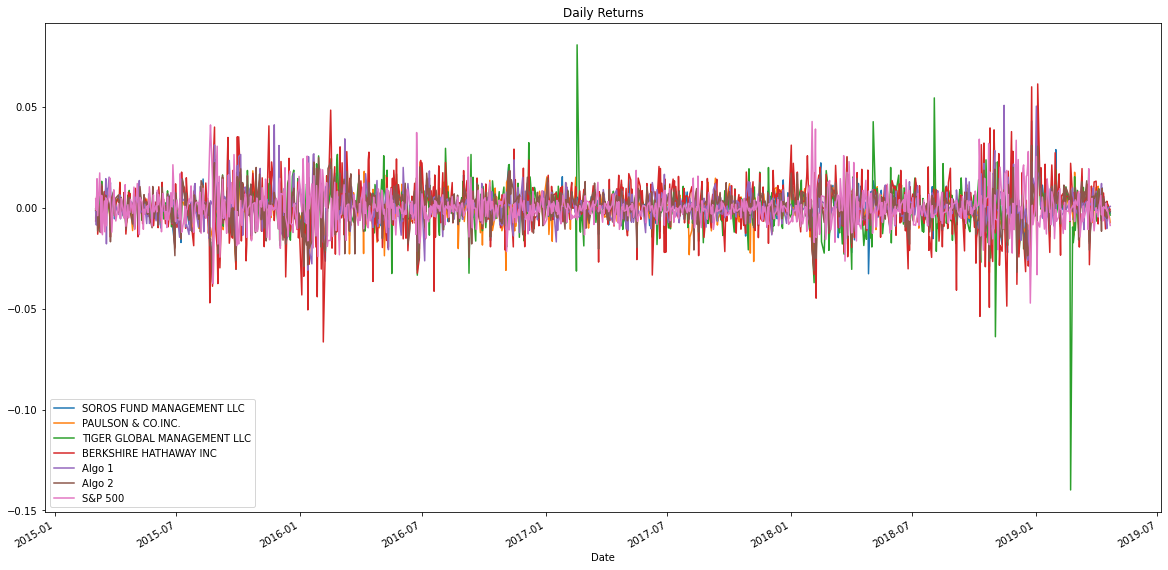

In [109]:
# Plot daily returns of all portfolios
combined_whale_algo_sp500.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

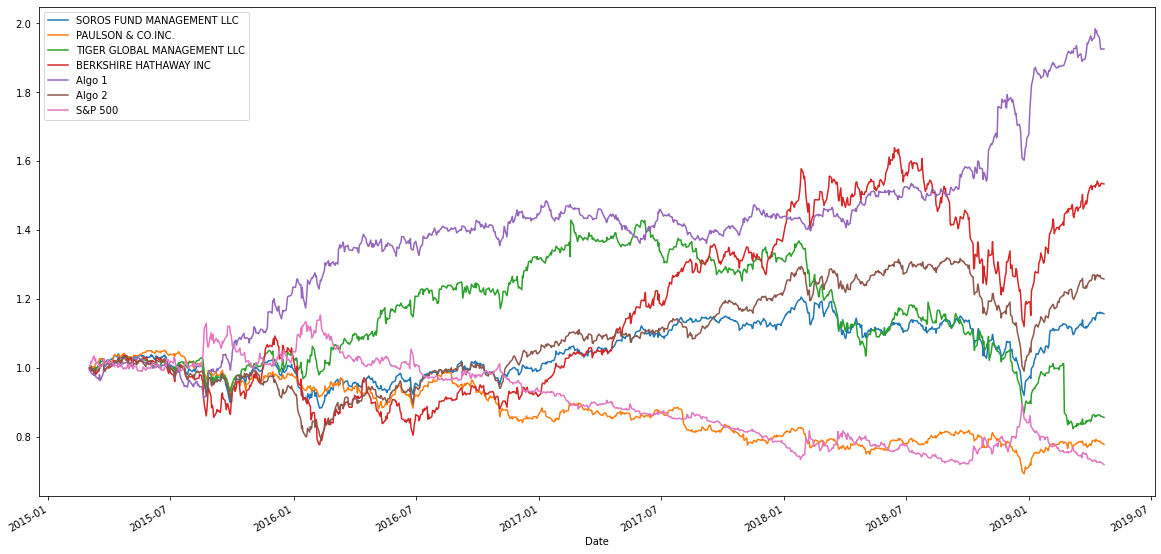

In [110]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_whale_algo_sp500).cumprod()
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


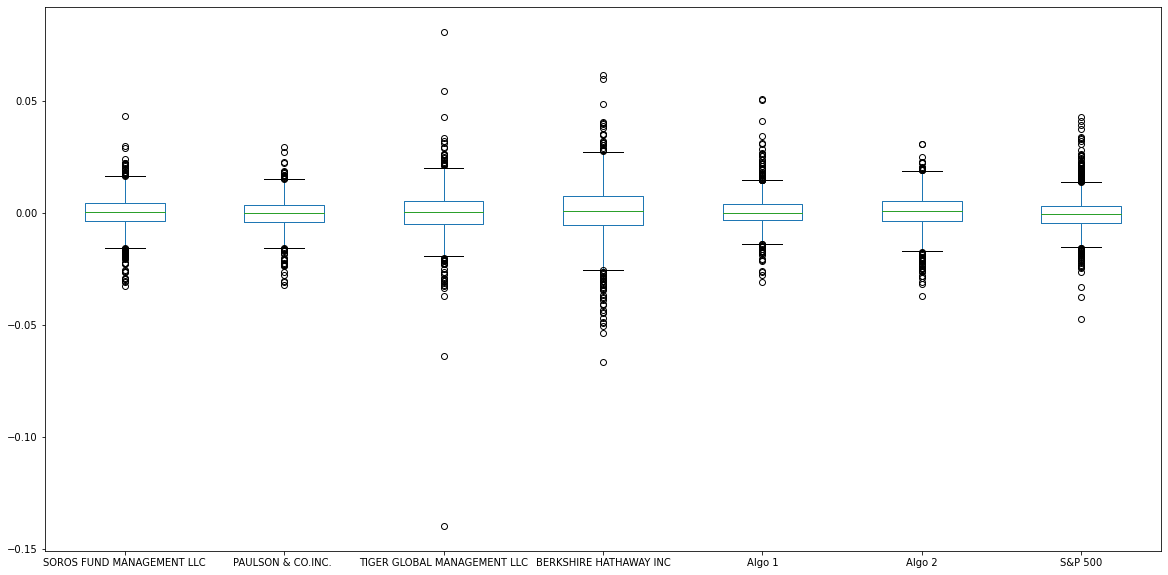

In [111]:
# Box plot to visually show risk
combined_whale_algo_sp500_boxplot = combined_whale_algo_sp500.boxplot(figsize = (20,10), grid = False)

### Calculate Standard Deviations

In [112]:
# Calculate the daily standard deviations of all portfolios
combined_whale_algo_sp500_std = combined_whale_algo_sp500.std()
combined_whale_algo_sp500_std.sort_values(inplace=True)
combined_whale_algo_sp500_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [113]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std.head()

S&P 500    0.008135
dtype: float64

In [114]:
# Determine which portfolios are riskier than the S&P 500
combined_whale_algo_sp500_std > combined_whale_algo_sp500_std['S&P 500']

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [116]:
# Below Portfolios are Riskier because their std is GREATER than SP500

### Calculate the Annualized Standard Deviation

In [117]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_whale_algo_sp500.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

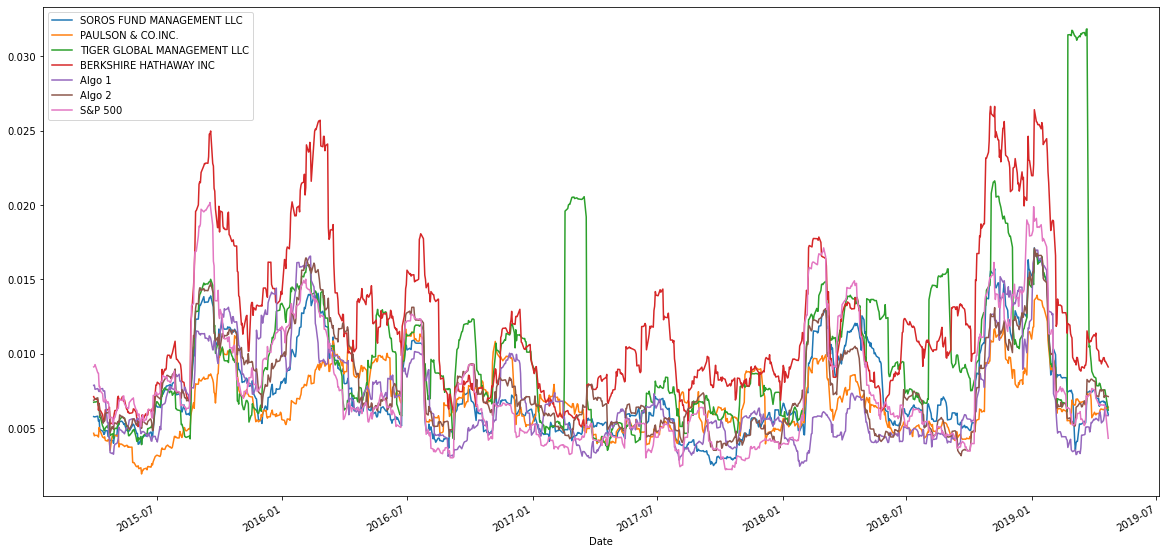

In [118]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
group_rolling = combined_whale_algo_sp500.rolling(window=21).std().plot(figsize = (20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

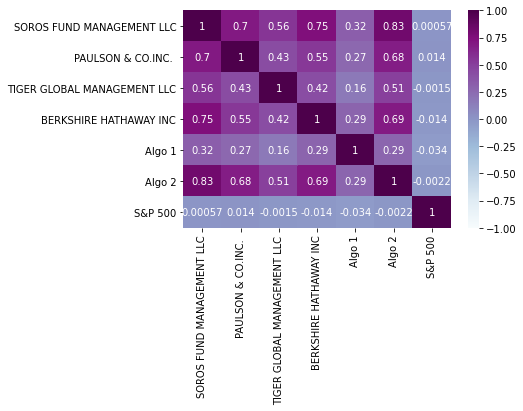

In [119]:
# Calculate the correlation
import seaborn as sns
import seaborn as sns
correlation = combined_whale_algo_sp500.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1, annot=True, cmap="BuPu") 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

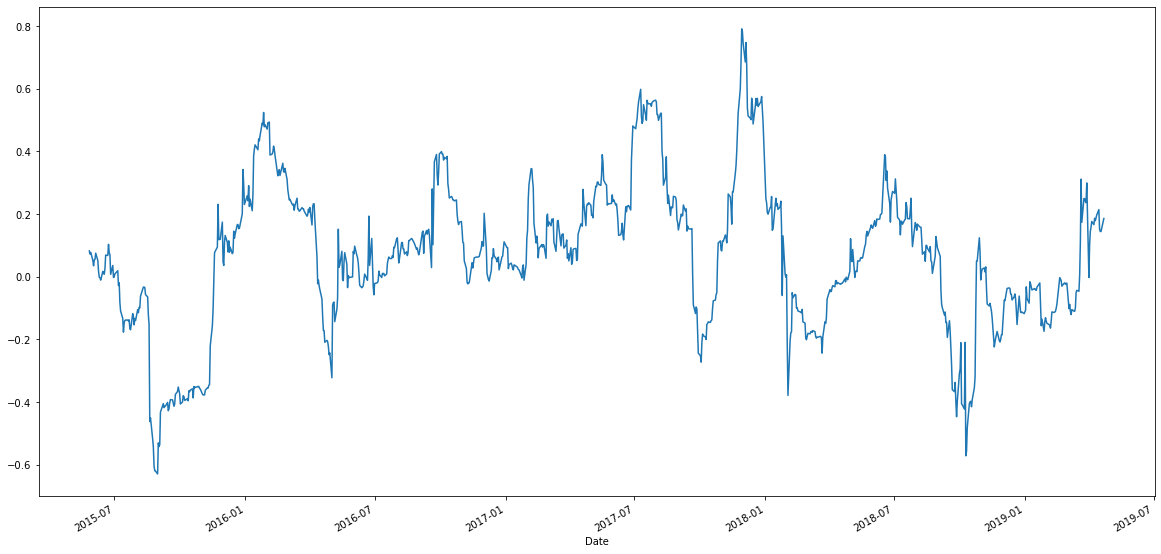

In [120]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_whale_algo_sp500['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_whale_algo_sp500['S&P 500'])
rolling_variance = combined_whale_algo_sp500['S&P 500'].rolling(window = 60).var()
rolling_combined_whale_algo_sp500_beta = rolling_covariance / rolling_variance
rolling_combined_whale_algo_sp500_beta.plot(figsize = (20,10))
# Calculate variance of S&P 500
# Computing beta

# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

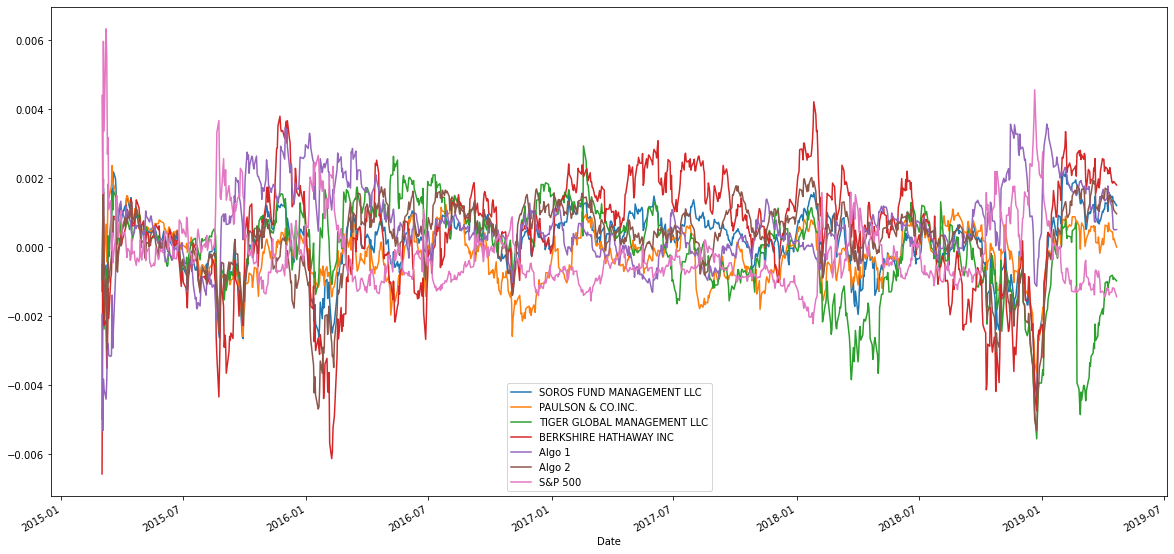

In [121]:
# Use `ewm` to calculate the rolling window
ewm = combined_whale_algo_sp500.ewm(halflife = 21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_whale_algo_sp500.mean() * 252) / (combined_whale_algo_sp500.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

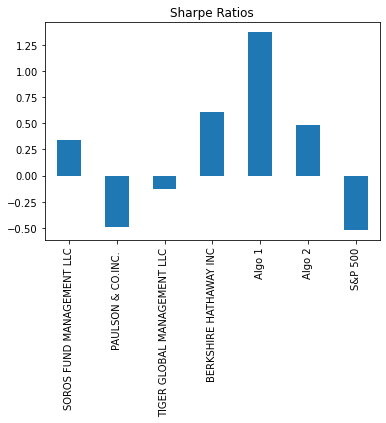

In [123]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both markets and whales portfolios. Algo 2 outperformed markets and all the whales except Berkshire hathway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [124]:
# Google LLC 

goog_csvpath = Path('./Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csvpath)
goog_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'GOOG'}, inplace=True)
goog_df['Date'] = pd.to_datetime(goog_df['Date'])
goog_df.set_index(goog_df['Date'], inplace=True)
goog_df.drop(columns=['Symbol','Date'], inplace=True)
goog_df.head()

,GOOG
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [125]:
# AAPL Stock Info
aapl_csvpath = Path('./Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csvpath)
aapl_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'AAPL'}, inplace=True)
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index(aapl_df['Date'], inplace=True)
aapl_df.drop(columns=['Symbol','Date'], inplace=True)
aapl_df.head()

,AAPL
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [126]:
# COSTCO Wholesale Stock info
cost_csvpath = Path('./Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csvpath)
cost_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'COST'}, inplace=True)
cost_df['Date'] = pd.to_datetime(cost_df['Date'])
cost_df.set_index(cost_df['Date'], inplace=True)
cost_df.drop(columns=['Symbol','Date'], inplace=True)
cost_df.head()

,COST
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [128]:
# Combine all stocks in a single DataFrame
stocks_combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [129]:
# Reset Date index
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [130]:
# Reorganize portfolio data by having a column per symbol
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [131]:
# Calculate daily returns
stocks_daily_returns = stocks_combined_df.pct_change()
# Drop NAs
stocks_daily_returns.dropna(inplace=True)
# Display sample data
stocks_daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [132]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio_returns = stocks_daily_returns.dot(weights)
# Display sample data
stock_portfolio_returns

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [136]:
all_portfolios = pd.concat([whale_returns, algo_returns,], axis='columns', join='inner')
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized `std`

combined_portfolios_daily_sd = all_portfolios.std()
combined_portfolios_annualized_sd = combined_portfolios_daily_sd * np.sqrt(252)
combined_portfolios_annualized_sd

SOROS FUND MANAGEMENT LLC      0.125080
PAULSON & CO.INC.              0.111281
TIGER GLOBAL MANAGEMENT LLC    0.172648
BERKSHIRE HATHAWAY INC         0.204650
Algo 1                         0.120660
Algo 2                         0.132186
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

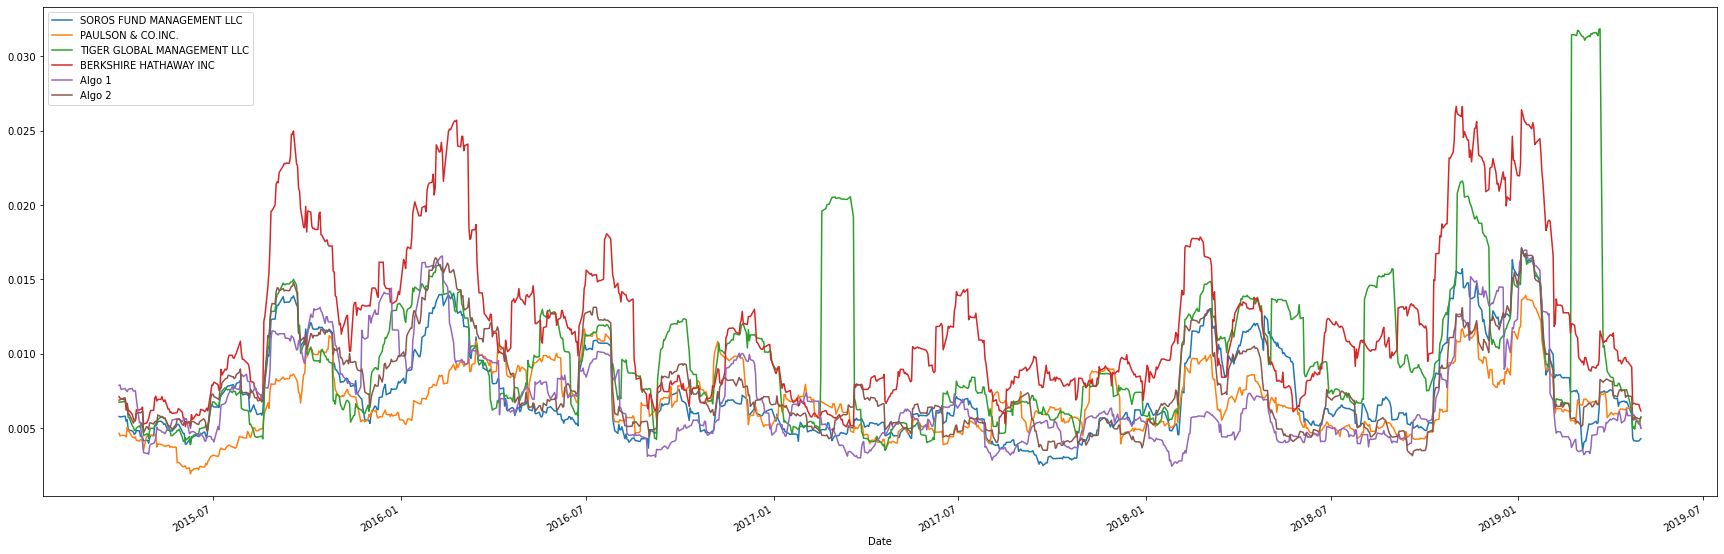

In [138]:
#Calculate rolling standard deviation
combined_portfolios_rolling_sd = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
combined_portfolios_rolling_sd.plot(figsize=(30,10))

### Calculate and plot the correlation

<AxesSubplot:xlabel='Date'>

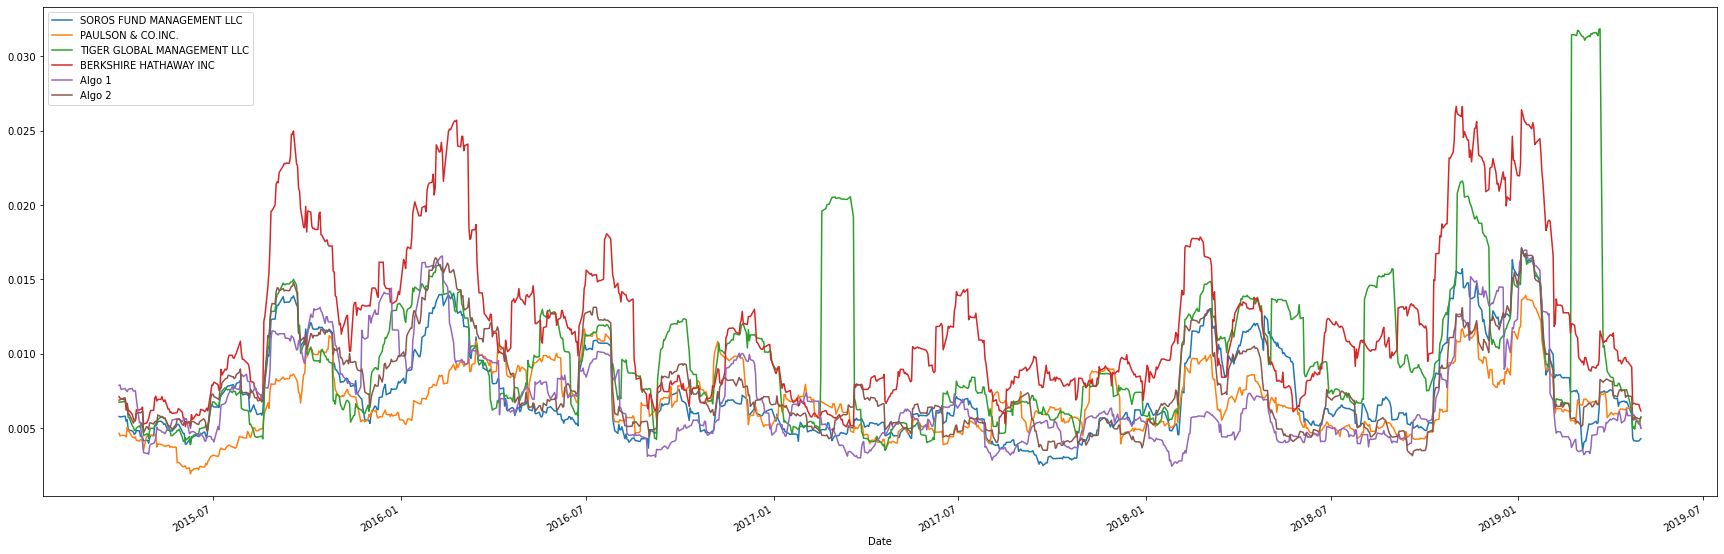

In [156]:
# Calculate and plot the correlation
combined_portfolios_rolling_sd = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
combined_portfolios_rolling_sd.plot(figsize=(30,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

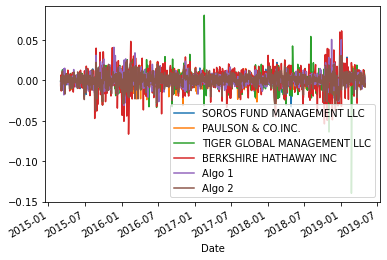

In [160]:
# Calculate and plot Beta
my_portfolio_beta = all_portfolios = pd.concat([whale_returns, algo_returns,], axis='columns', join='inner')

my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Calculate Annualzied Sharpe Ratios
combined_annualized_sharp_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
combined_annualized_sharp_ratios

SOROS FUND MANAGEMENT LLC      0.363287
PAULSON & CO.INC.             -0.464328
TIGER GLOBAL MANAGEMENT LLC   -0.118819
BERKSHIRE HATHAWAY INC         0.622576
Algo 1                         1.388424
Algo 2                         0.485438
dtype: float64

<AxesSubplot:>

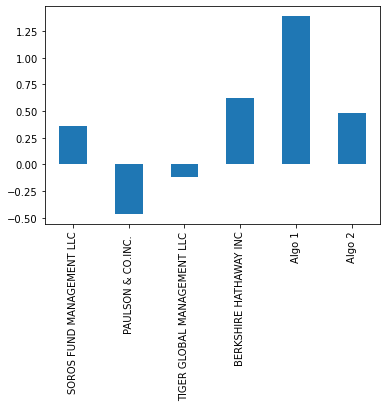

In [166]:
# Visualize the sharpe ratios as a bar plot
combined_annualized_sharp_ratios.plot(kind='bar')

### How does your portfolio do?

My portfolio underperformed compared to  Algorithms, S&P 500 and that of the Whales